In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# When conducting EDA, there are always some good practices: 


1.   Look for nulls in the data
2.   Plot graphs that are applicable (e.g. categorical, continuous, time, etc)



In [2]:
testing_results = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_testing.csv')
confirmed_results = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv')

## Confirmed Cases EDA

In [3]:
confirmed_results.head() #see a 5 row dataframe for a brief look at the data

,case_id,date,YYYYMMDD,country,province,geo_subdivision,age,gender,transmission_type,type
0,1,05-03-2020,20200305,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
1,2,07-03-2020,20200307,South Africa,GP,ZA-GP,39.0,female,Travelled to Italy,travel
2,3,08-03-2020,20200308,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel
3,4,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,male,Travelled to Italy,travel
4,5,09-03-2020,20200309,South Africa,KZN,ZA-KZN,38.0,female,Travelled to Italy,travel


In [4]:
confirmed_results.describe() #summary of all the confirmed cases

,case_id,YYYYMMDD,age
count,709.000000,7.090000e+02,273.000000
mean,355.028209,2.020032e+07,41.787546
std,204.779782,3.510615e+00,15.901544
min,1.000000,2.020030e+07,2.000000
25%,178.000000,2.020032e+07,31.000000
50%,355.000000,2.020032e+07,40.000000
75%,532.000000,2.020032e+07,54.000000
max,709.000000,2.020032e+07,85.000000


From these two tables, we can start dropping unnecessary columns:



*   ```YYYYMMDD``` - we already have the date and this format is an ```int``` and not a ```datetime``` variable. 
*   ```case_id``` - Not relevant to the data as we can just utilise counts
* ```geo_subdivision``` - country and province already supplied



In [5]:
confirmed_results = confirmed_results.drop(columns=['case_id', 'YYYYMMDD','geo_subdivision'])

In [6]:
confirmed_results.head() #new dataframe

,date,country,province,age,gender,transmission_type,type
0,05-03-2020,South Africa,KZN,38.0,male,Travelled to Italy,travel
1,07-03-2020,South Africa,GP,39.0,female,Travelled to Italy,travel
2,08-03-2020,South Africa,KZN,38.0,female,Travelled to Italy,travel
3,09-03-2020,South Africa,KZN,38.0,male,Travelled to Italy,travel
4,09-03-2020,South Africa,KZN,38.0,female,Travelled to Italy,travel


Now let's graph some of the data!



1.   Let's find the distribution of ```age``` for the population.
2.   Number of cases in each ```province```.
3.   Number of males vs females, i.e the ```gender```.
4.   Number of cases for each ```date``` and the cumulative cases.



## Age Distribution

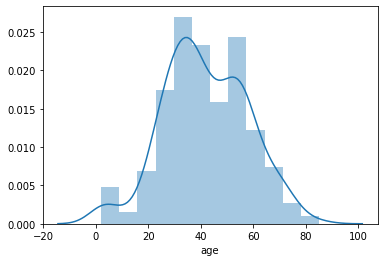

In [12]:
sns.distplot(confirmed_results['age'].dropna(),
             kde=True)

Nice curves! but it doesn't indicate the distribution for each age very well and the formatting is messy.

In [13]:
sns.distplot??

C:\Users\kopan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\kopan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\kopan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\kopan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


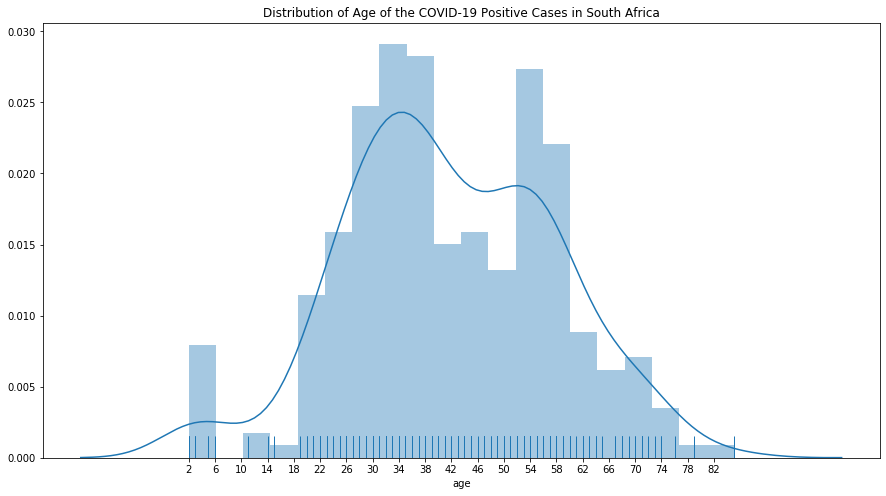

In [14]:
plt.figure(figsize=(15,8)) #Set figure size
plt.title('Distribution of Age of the COVID-19 Positive Cases in South Africa') #Set axis title
plt.xticks(np.arange(confirmed_results['age'].min(), confirmed_results['age'].max(), step=4))  # Set label locations.

sns.distplot(confirmed_results['age'],
             bins=20,
             kde=True,
             rug=True) #"rug" will give the ticks on the x-axis

Try see if you can answer the following questions from the graph:

1. What is the age of the oldest person to be infected in South Africa with the COVID-19 virus?

2. Which of the following age groups has the most amount of cases of COVID-19:


> a. 12-20 <br>
> b. 30-38 <br>
> c. 38-46 <br>
> d. 54-68





Try testing out the following parameters to adjust the graph:
1. ```n_of_bins``` = gives the number of histogram bars (set between 10 & 100)
2. ```xticks``` = gives number of rug interval ticks on the x-axis (age) (set between 1 & 5)

In [15]:
def distribution_plot(n_of_bins, xticks):
  plt.figure(figsize=(15,8)) #Set figure size
  plt.title('Distribution of Age of the COVID-19 Positive Cases in South Africa') #Set axis title
  plt.xticks(np.arange(confirmed_results['age'].min(), confirmed_results['age'].max(), step=4))  # Set label locations.

  sns.distplot(confirmed_results['age'],
             bins=n_of_bins,
             kde=True,
             rug=True)

## Number of Cases in each Province

In [16]:
sns.countplot?

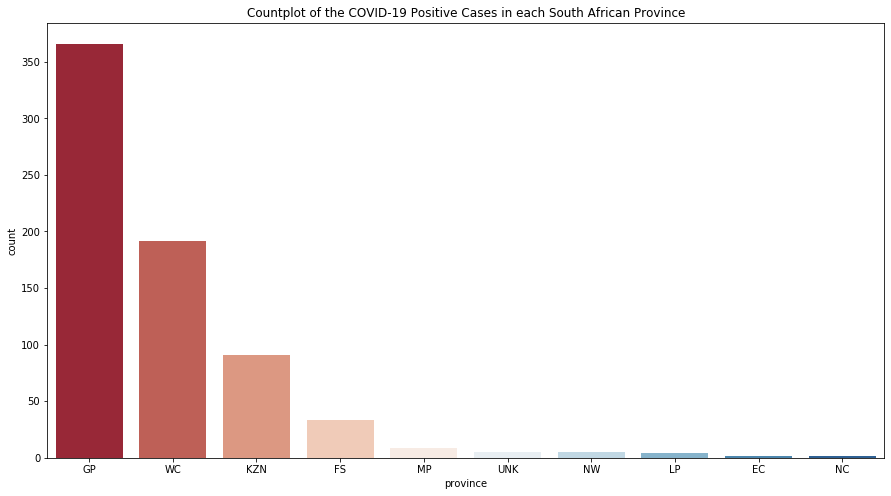

In [17]:
plt.figure(figsize=(15,8)) #Set figure size
plt.title('Countplot of the COVID-19 Positive Cases in each South African Province')

sns.countplot(confirmed_results['province'],
              order = confirmed_results['province'].value_counts().index,
              palette='RdBu')

## Gender Differences

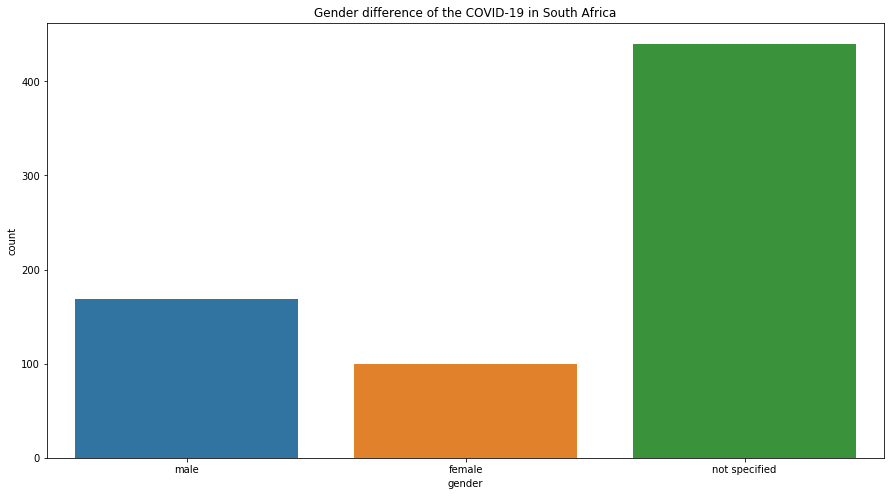

In [18]:
plt.figure(figsize=(15,8)) #Set figure size
plt.title('Gender difference of the COVID-19 in South Africa')

sns.countplot(confirmed_results['gender'])


"not specified" Seems to make up the majority of cases. Is the Government not recording its results properly?

## Cumulative cases

We will investigate how the number of infected cumulatively in SOuth Africa

In [19]:
print('Number of rows and columns in the dataframe: ' + str(confirmed_results.shape)) #"shape" will give this tupple of rows and columns
print('Number of rows: ' + str(confirmed_results.shape[0])) #you can index a tuple like a list!

Number of rows and columns in the dataframe: (709, 7)
Number of rows: 709


In [20]:
confirmed_results[['date', 'country']].groupby('date').count() # sum of cases for each day

,country
date,
05-03-2020,1
07-03-2020,1
08-03-2020,1
09-03-2020,4
11-03-2020,6
12-03-2020,3
13-03-2020,8
14-03-2020,14
15-03-2020,13


In [21]:
confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'}) # "cumsum()" will give the cumulative sum

,date,cumulative sum
0,05-03-2020,1
1,07-03-2020,2
2,08-03-2020,3
3,09-03-2020,7
4,11-03-2020,13
5,12-03-2020,16
6,13-03-2020,24
7,14-03-2020,38
8,15-03-2020,51
9,16-03-2020,62


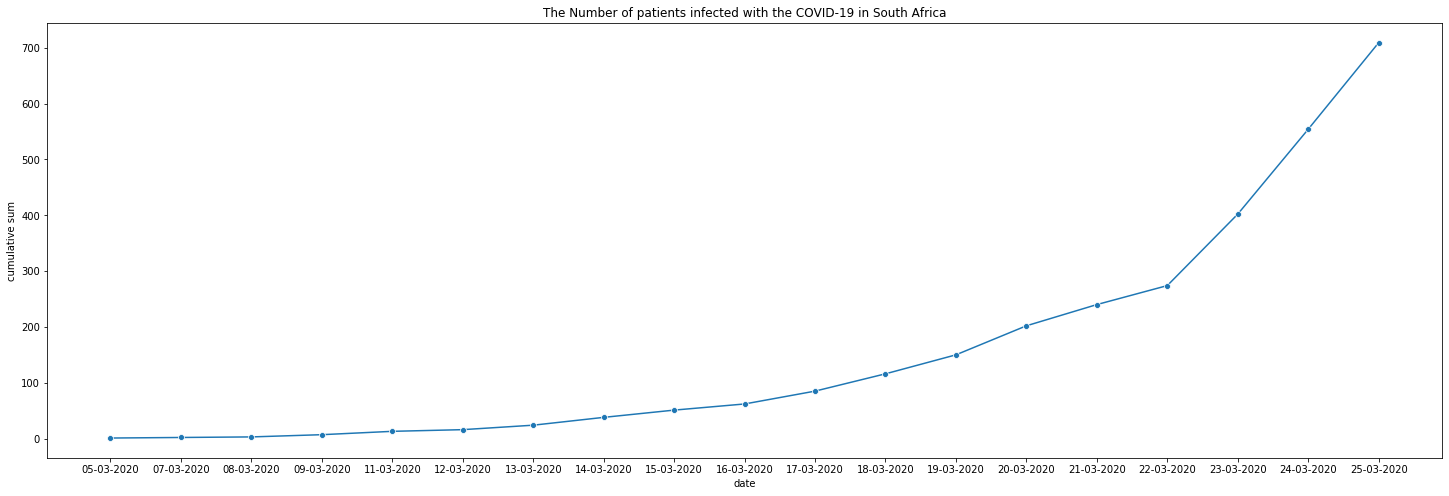

In [22]:
cumulative_cases = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'})

plt.figure(figsize=(25,8)) #Set figure size
plt.title('The Number of patients infected with the COVID-19 in South Africa')

sns.lineplot(data=cumulative_cases, x='date', y='cumulative sum',
             marker='o')

So we've managed to plot a great cumulative line graph. Although, we can not see the numbers per date which would be really informative! In order to annotate the markers, we'll have to write a for loop for each point

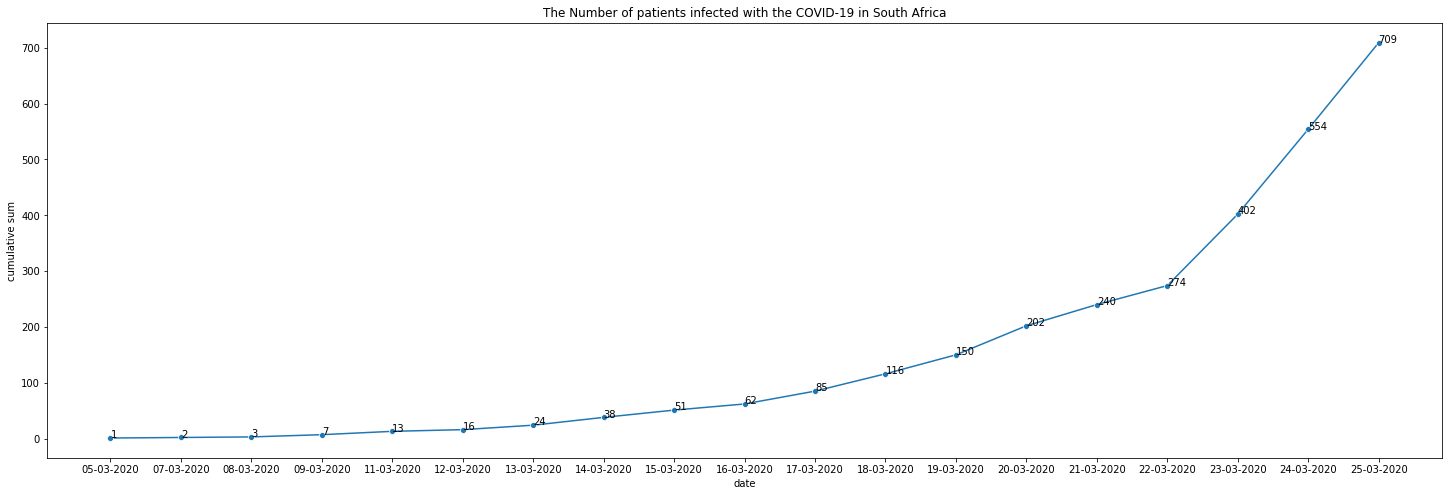

In [23]:
cumulative_cases = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'}) #create cumulative dataframe

plt.figure(figsize=(25,8)) #Set figure size
plt.title('The Number of patients infected with the COVID-19 in South Africa')


ax = sns.lineplot(data=cumulative_cases, x='date', y='cumulative sum', 
                  marker='o', 
                  dashes=False)

for i in cumulative_cases.groupby('date'):
    #i[1] is a grouped data frame; looping through each data row in the cumulative dataframe
    for x,y,m in i[1][['date','cumulative sum','cumulative sum']].values:  # x = x value; y = y_value ; m = marker value
        ax.text(x,y,f'{m:.0f}') #ax.text will 

plt.show()

# Wrap up a quick dashboard!

We managed to get a great summary of the data. Let's put it all together into a mini grid dashboard!

Total Number of Cases: 709


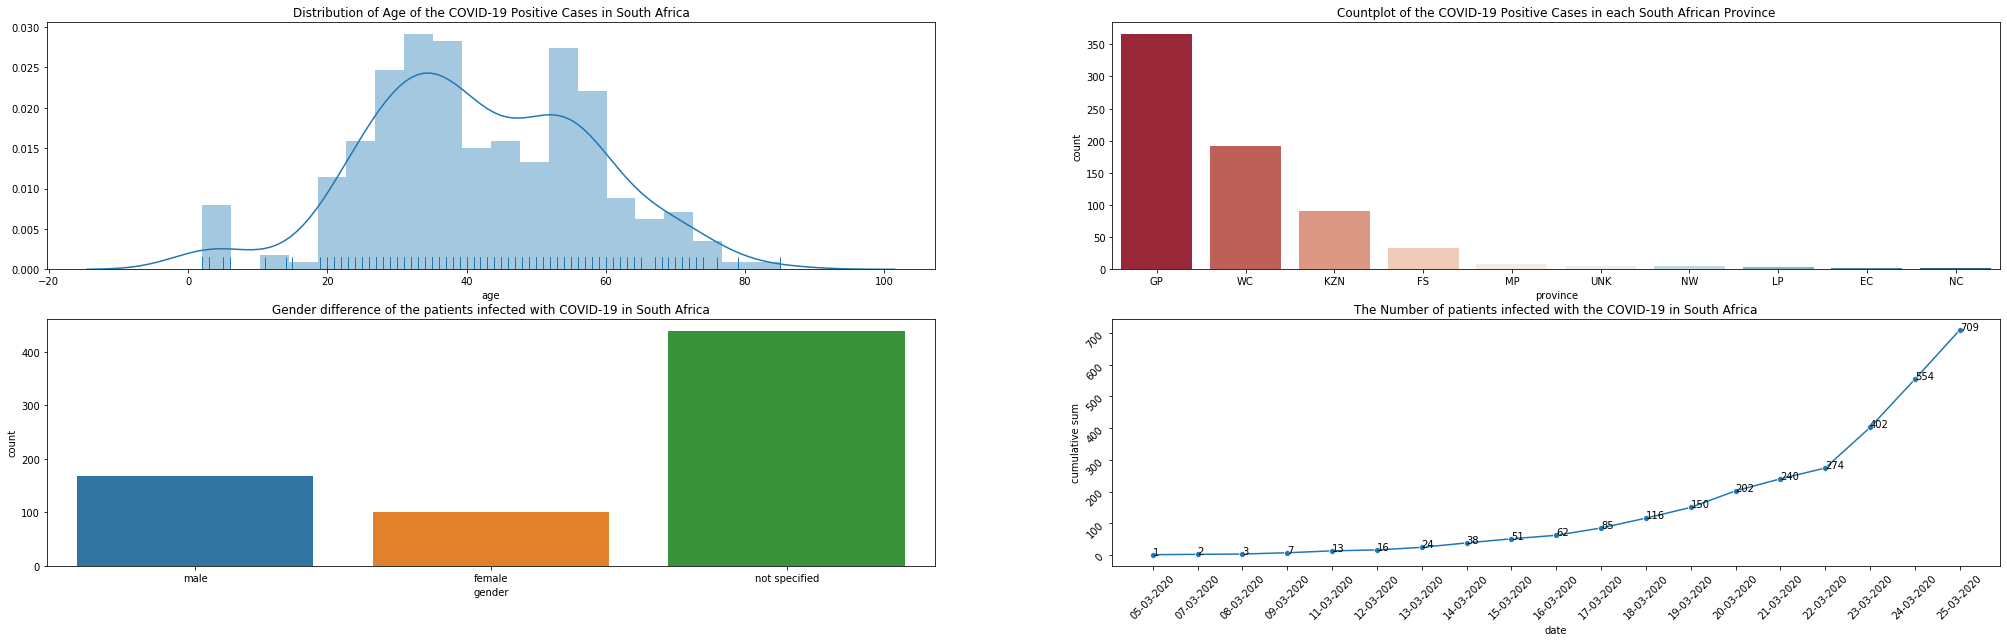

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(35,10))

sns.distplot(confirmed_results['age'],
             bins=20,
             kde=True,
             rug=True,
             ax=ax[0,0])
ax[0,0].title.set_text('Distribution of Age of the COVID-19 Positive Cases in South Africa')

sns.countplot(confirmed_results['province'],
              order = confirmed_results['province'].value_counts().index,
              palette='RdBu',
              ax=ax[0,1])

ax[0,1].title.set_text('Countplot of the COVID-19 Positive Cases in each South African Province')

sns.countplot(confirmed_results['gender'], ax=ax[1,0])

ax[1,0].title.set_text('Gender difference of the patients infected with COVID-19 in South Africa')

sns.lineplot(data=cumulative_cases, x='date', y='cumulative sum', 
                  marker='o', 
                  dashes=False,
                  ax=ax[1,1])


for i in cumulative_cases.groupby('date'):
    #i[1] is a grouped data frame; looping through each data row in the cumulative dataframe
    for x,y,m in i[1][['date','cumulative sum','cumulative sum']].values:  # x = x value; y = y_value ; m = marker value
        ax[1,1].text(x,y,f'{m:.0f}') #ax.text will 

ax[1,1].title.set_text('The Number of patients infected with the COVID-19 in South Africa')
ax[1,1].tick_params(labelrotation=45)

print('Total Number of Cases: ' + str(confirmed_results.shape[0]))